In [1]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [24]:
def make_maze(w = 16, h = 8):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
 
maze=numpy.array(make_maze(8,8))

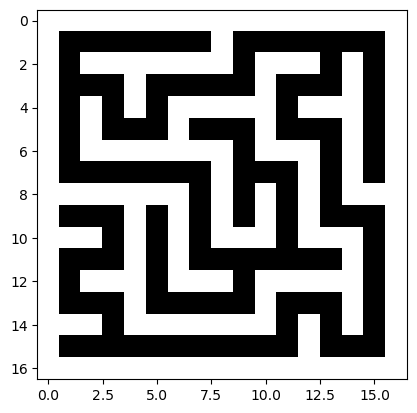

In [26]:
maze=numpy.array(make_maze(8,8))
imshow(maze,cmap="gray")
plt.show()

In [28]:
print(maze)
print(maze.shape)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1]
 [1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1]
 [1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1]
 [1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1]
 [1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1]
 [1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1]
 [1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1]
 [1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1]
 [1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(17, 17)


In [30]:

# Policy initialization: varje riktning börjar med en lika sannolikhet på 0.25 (1/4)
policy = np.ones((17, 17, 4)) / 4.0  # Skapar en 3D-array där varje riktning har samma sannolikhet i början

# Definiera rörelser för varje riktning (upp, höger, ned, vänster)
xMovement = [0, 1, 0, -1]  # Hur x-koordinaten ändras beroende på riktningen
yMovement = [1, 0, -1, 0]  # Hur y-koordinaten ändras beroende på riktningen

# Belöningens decay-faktor (hur mycket belöningarna minskar över tid)
decay = 0.9  # Om decay används kommer belöningarna att minska med 10% för varje steg

# Belöningsvärden
goal_reward = 1.0  # Belöning för att nå målet
step_reward = 0.0  # Belöning för varje steg agenten tar (här får agenten ingen belöning för att gå)

# Loopa genom varje cell i labyrinten (1 till 15) för att sätta upp policyn
for x in range(1, 16):  # Går igenom varje cell i labyrinten, från x=1 till x=15
    for y in range(1, 16):  # Går igenom varje cell i labyrinten, från y=1 till y=15
        if maze[x][y] == 0:  # Om cellen är öppen (0 representerar öppna vägar)
            for a in range(4):  # För varje riktning (upp, höger, ned, vänster)
                if maze[x + xMovement[a]][y + yMovement[a]] == 1:  # Kolla om rörelsen leder till en vägg
                    policy[x][y][a] = 0.0  # Om det är en vägg, sätt sannolikheten för att gå i den riktningen till 0
            policy[x][y] = policy[x][y] / policy[x][y].sum()  # Normalisera policyn för att säkerställa att sannolikheterna summerar till 1

# Lista för att hålla reda på antalet steg som tas i varje episod
L = []  # Här sparas antalet steg som tas i varje körning (episod)

# Kör 100 episoder av agenten som försöker hitta målet
for reps in range(100):  # Loopa 100 gånger för att skapa 100 episoder
    X = list()  # Lista för att hålla x-positionerna som agenten besöker
    Y = list()  # Lista för att hålla y-positionerna som agenten besöker
    X.append(1)  # Starta vid position (1, 1)
    Y.append(1)
    A = list()  # Lista för att hålla riktningarna (handlingarna) som agenten väljer

    total_reward = 0  # Håll reda på den totala belöningen för denna episod
    while not((X[-1] == 15) and (Y[-1] == 15)):  # Fortsätt tills agenten når målet (15, 15)
        x = X[-1]  # Hämta den senaste x-positionen
        y = Y[-1]  # Hämta den senaste y-positionen
        # Välj en riktning baserat på den aktuella policyn för den nuvarande positionen
        direction = np.random.choice([0, 1, 2, 3], p=policy[x][y])  
        x = x + xMovement[direction]  # Uppdatera x-positionen beroende på vald riktning
        y = y + yMovement[direction]  # Uppdatera y-positionen beroende på vald riktning
        X.append(x)  # Lägg till den nya x-positionen i listan
        Y.append(y)  # Lägg till den nya y-positionen i listan
        A.append(direction)  # Lägg till den valda riktningen i actions-listan

        # Belöningssystem:
        if (x == 15 and y == 15):  # Om agenten når målet (15, 15)
            reward = goal_reward  # Belöningen sätts till 1.0
        else:  # Om agenten inte har nått målet
            reward = step_reward  # Belöningen är 0.0 för varje annat steg

        total_reward += reward  # Ackumulera den totala belöningen för denna episod

    # Skriv ut antalet steg och den totala belöningen för denna episod
    print(f"Episode {reps+1}: Steps = {len(A)}, Reward = {total_reward}")
    L.append(len(A))  # Lägg till antalet steg till listan L

    learningRate = 0.1  # Lärande hastighet för att uppdatera policyn

    # Uppdatera policyn baserat på de handlingar som valdes under denna episod
    for i in range(len(A)):  
        policy[X[i]][Y[i]][A[i]] += learningRate * reward  # Öka sannolikheten för den valda riktningen baserat på belöningen

    # Normalisera policyn igen för att säkerställa att sannolikheterna summerar till 1 för varje cell
    for x in range(17):  
        for y in range(17):
            policy[x][y] = policy[x][y] / policy[x][y].sum()  # Normalisera sannolikheterna för varje cell så att de summerar till 1




Episode 1: Steps = 1112, Reward = 1.0
Episode 2: Steps = 174, Reward = 1.0
Episode 3: Steps = 986, Reward = 1.0
Episode 4: Steps = 330, Reward = 1.0
Episode 5: Steps = 1462, Reward = 1.0
Episode 6: Steps = 308, Reward = 1.0
Episode 7: Steps = 602, Reward = 1.0
Episode 8: Steps = 392, Reward = 1.0
Episode 9: Steps = 982, Reward = 1.0
Episode 10: Steps = 584, Reward = 1.0
Episode 11: Steps = 1228, Reward = 1.0
Episode 12: Steps = 790, Reward = 1.0
Episode 13: Steps = 1098, Reward = 1.0
Episode 14: Steps = 676, Reward = 1.0
Episode 15: Steps = 728, Reward = 1.0
Episode 16: Steps = 480, Reward = 1.0
Episode 17: Steps = 302, Reward = 1.0
Episode 18: Steps = 192, Reward = 1.0
Episode 19: Steps = 168, Reward = 1.0
Episode 20: Steps = 256, Reward = 1.0
Episode 21: Steps = 486, Reward = 1.0
Episode 22: Steps = 316, Reward = 1.0
Episode 23: Steps = 98, Reward = 1.0
Episode 24: Steps = 216, Reward = 1.0
Episode 25: Steps = 118, Reward = 1.0
Episode 26: Steps = 102, Reward = 1.0
Episode 27: Steps 

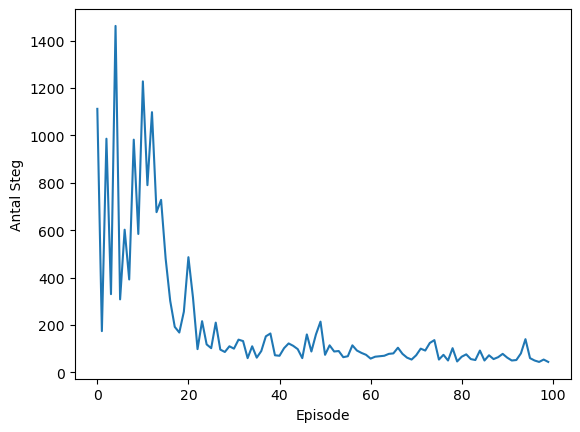

In [32]:
# Plotta antalet steg agenten tog under varje körning (antalet steg i listan L)
plt.plot(L)
plt.xlabel("Episode")
plt.ylabel("Antal Steg")
plt.show()

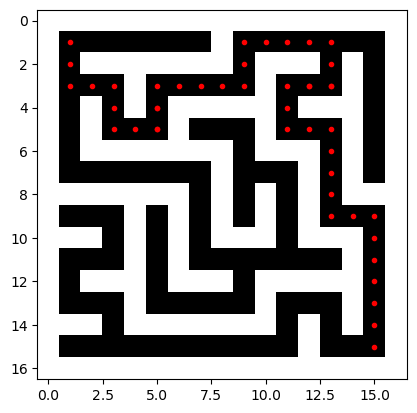

In [34]:
imshow(maze,cmap="gray")
plot(Y,X,".r")
plt.show()